# Jupyter notebook of CSPC54 Assignment
### Phishing Website Detection using Machine Learning and Artificial Intelligence

## H KAILASH - 106119050   |   INDRESH P - 106119052

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
import seaborn as sns



print("Imports Done")

Imports Done


### Importing data and basic description

In [2]:
data = pd.read_csv('mydataset.csv')
data.head()

Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecording  WebsiteTraffic  PageRank  GoogleIndex  \
0           -1            -1               0        -1            1   
1            1            -1               1        -1            1   
2           -1            -1               1        -1            1   
3           -1            -1               0        -1            1   
4            1             1               1        -1            1   

   LinksPointingToPage  StatsReport  class  
0                    1            1     -1  
1                    0           -1     -1  
2                   -1            1     -1  
3                    1            1      1  
4                   -1           -1      1  

[5 rows x 32 columns]

In [3]:
print(data.describe())
data.isnull().sum()

              Index       UsingIP       LongURL      ShortURL       Symbol@  \
count  11054.000000  11054.000000  11054.000000  11054.000000  11054.000000   
mean    5526.500000      0.313914     -0.633345      0.738737      0.700561   
std     3191.159272      0.949495      0.765973      0.674024      0.713625   
min        0.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%     2763.250000     -1.000000     -1.000000      1.000000      1.000000   
50%     5526.500000      1.000000     -1.000000      1.000000      1.000000   
75%     8289.750000      1.000000     -1.000000      1.000000      1.000000   
max    11053.000000      1.000000      1.000000      1.000000      1.000000   

       Redirecting//  PrefixSuffix-    SubDomains         HTTPS  DomainRegLen  \
count   11054.000000   11054.000000  11054.000000  11054.000000  11054.000000   
mean        0.741632      -0.734938      0.064049      0.251040     -0.336711   
std         0.670837       0.678165      0.81

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

### Mapping values of the class feature from {-1, 1} to {0, 1}

In [4]:
data['class'] = data['class'].map({-1: 0, 1: 1})

### Splitting features and classification result from the dataset

In [5]:
X = data.iloc[:, 1:31].values.astype(int)
y = data.iloc[:, 31].values.astype(int)

### Randomly splitting the dataset in a ratio of 4:1 for training and testing the models respectivly

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

### Creating the objects for the following machine learning models
## Naive bayes Classifier
## Logistic Regression
## Support Vector Machine
## Neural Networks (Using multi-layer perceptron)

In [7]:
logreg = LogisticRegression()
mysvm = svm.SVC()
mlc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
nbc = GaussianNB()

## Fitting the training data in the models to train

In [8]:
nbc.fit(X_train, y_train)
logreg.fit(X_train, y_train)
mysvm.fit(X_train, y_train)
mlc.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [36]:
print('Naive Bayes accuracy: {0:.3f}%'.format(accuracy_score(y_test, nbc.predict(X_test)) * 100))
print('Logistic Regression accuracy: {0:.3f}%'.format(accuracy_score(y_test, logreg.predict(X_test)) * 100))
print('Support vector Machine accuracy: {0:.3f}%'.format(accuracy_score(y_test, mysvm.predict(X_test)) * 100))
print('Neural Networks MLP classifier: {0:.3f}%'.format(accuracy_score(y_test, mlc.predict(X_test)) * 100))

Naive Bayes accuracy: 62.913%
Logistic Regression accuracy: 92.718%
Support vector Machine accuracy: 94.799%
Neural Networks MLP classifier: 96.020%


In [10]:
data.columns[1:31]

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport'],
      dtype='object')

## KDE plots of relationship between individual features and the classification result

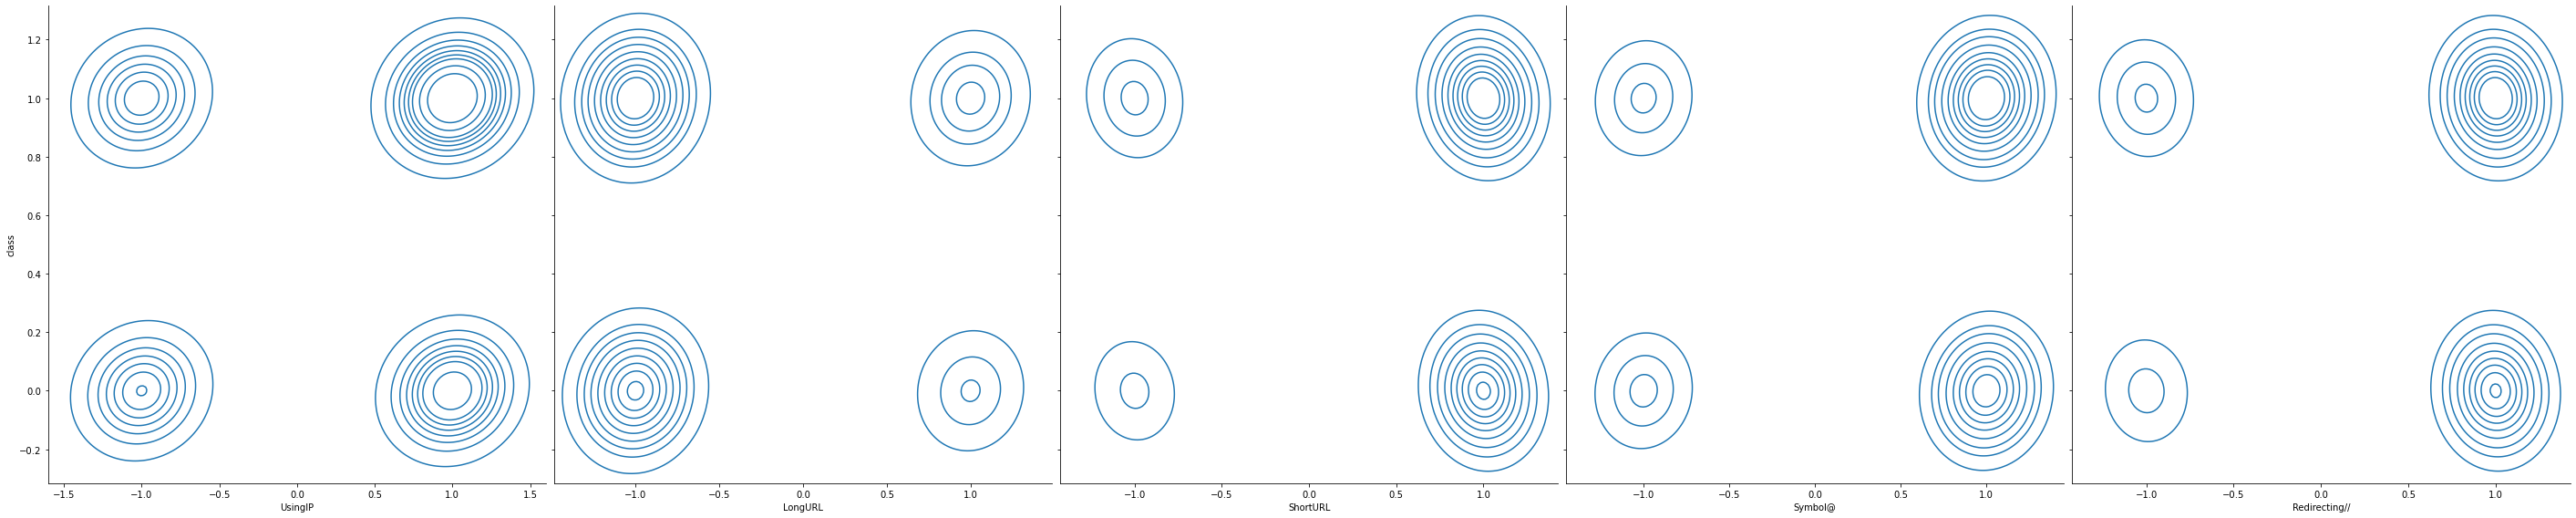

In [11]:
sns.pairplot(data, x_vars=data.columns[1:6], y_vars=['class'], height=8, aspect=1, kind='kde')

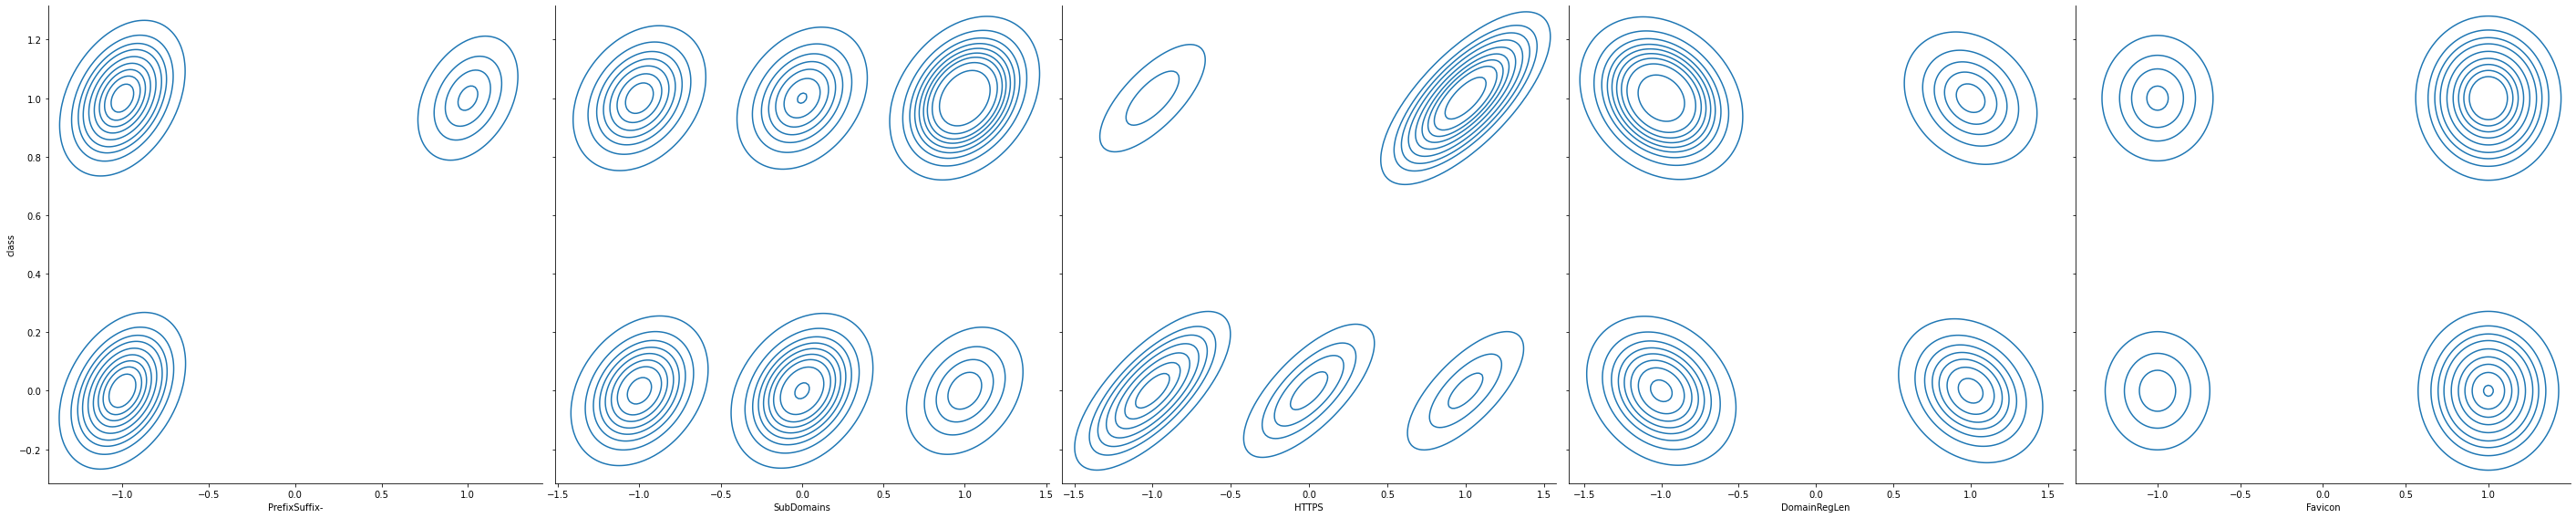

In [12]:
sns.pairplot(data, x_vars=data.columns[6:11], y_vars=['class'], height=8, aspect=1, kind='kde')

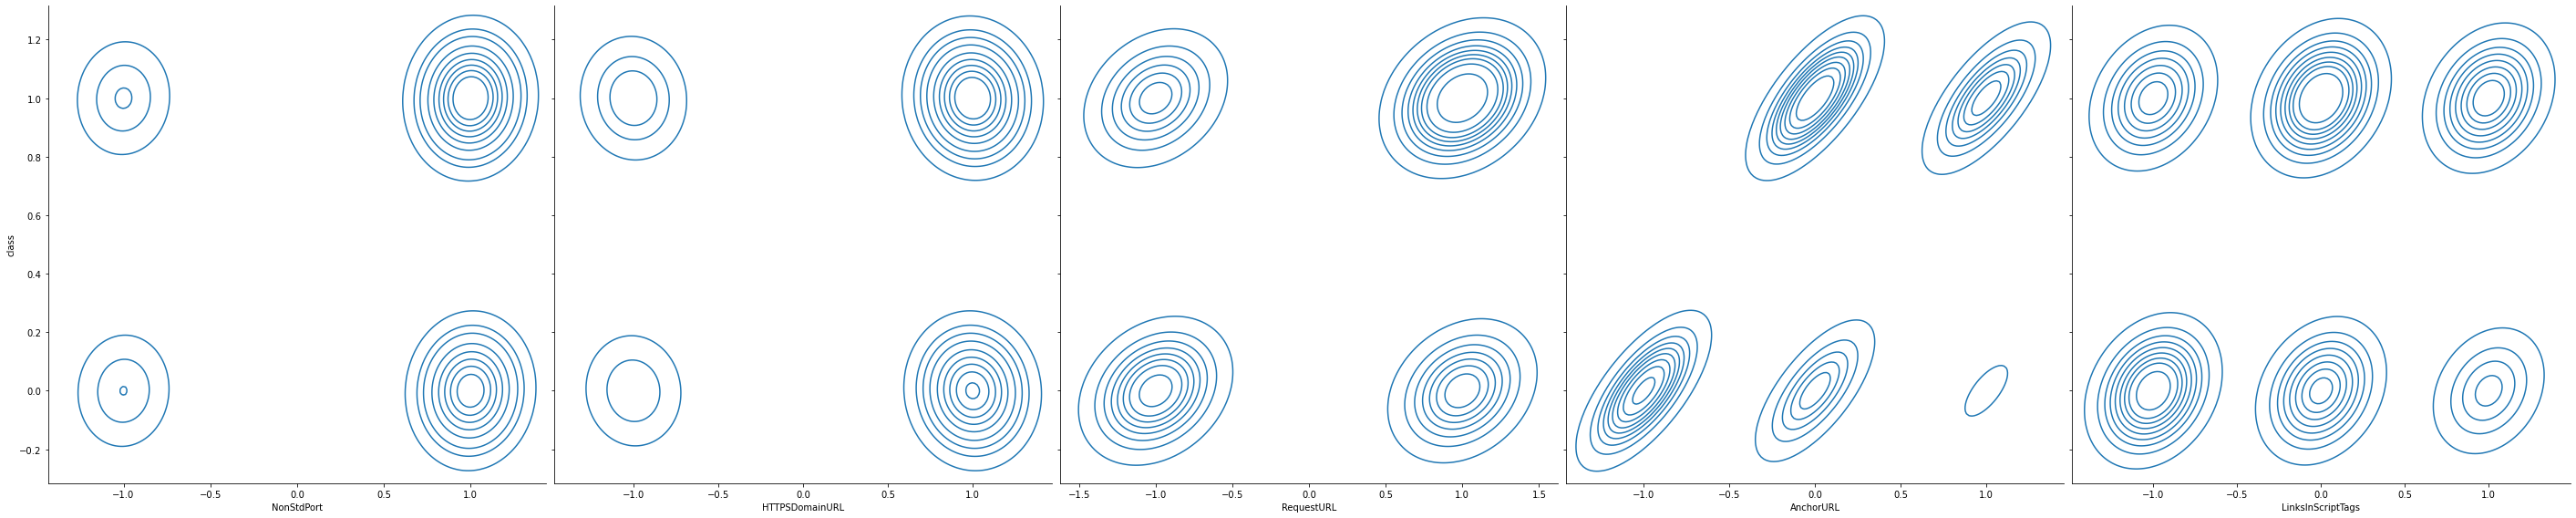

In [13]:
sns.pairplot(data, x_vars=data.columns[11:16], y_vars=['class'], height=8, aspect=1, kind='kde')

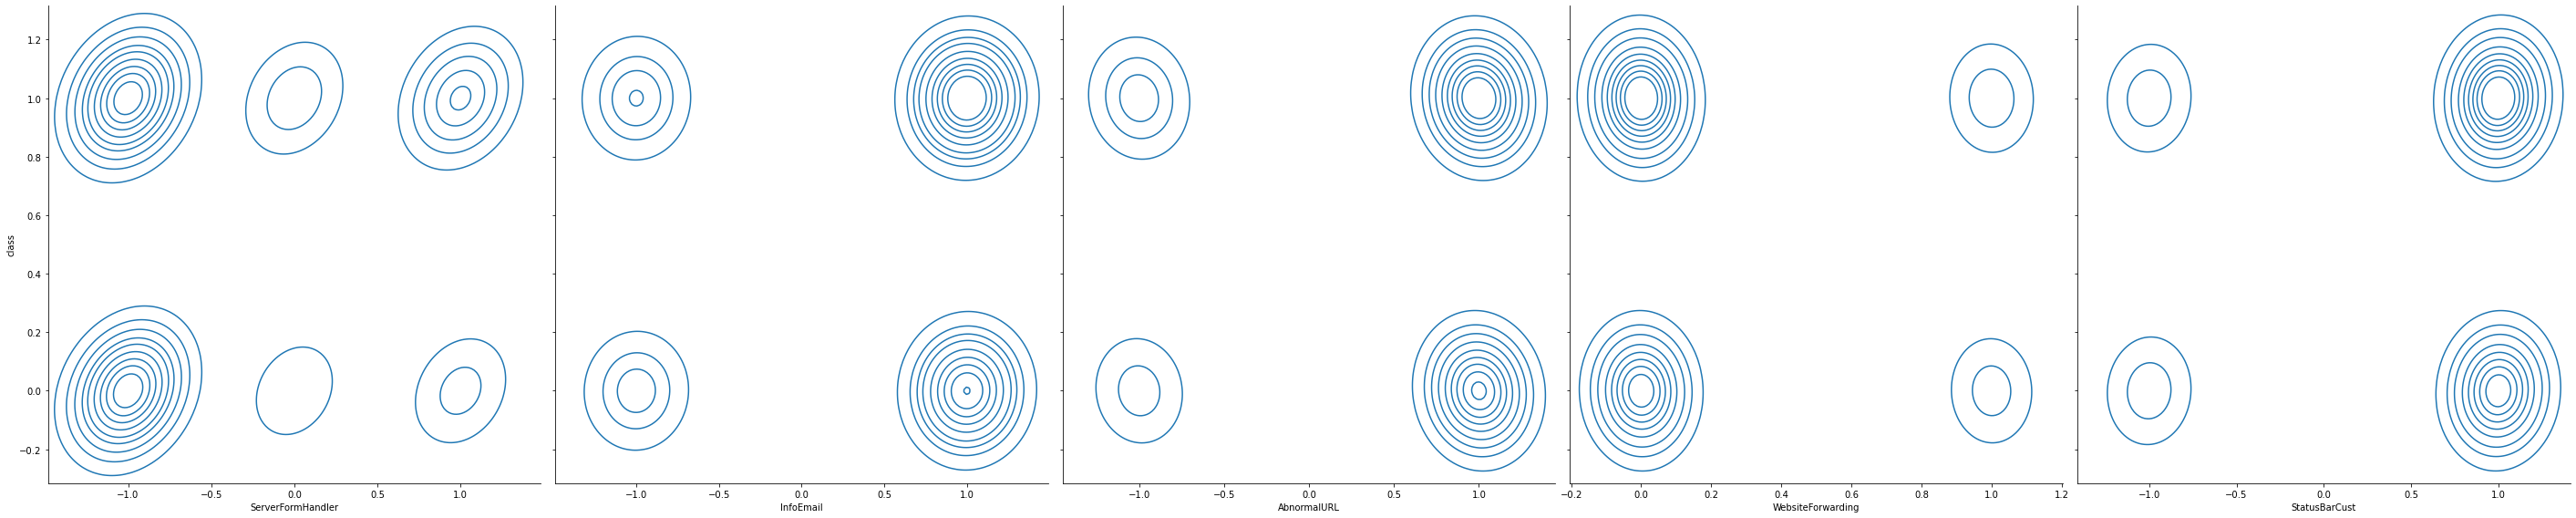

In [14]:
sns.pairplot(data, x_vars=data.columns[16:21], y_vars=['class'], height=8, aspect=1, kind='kde')

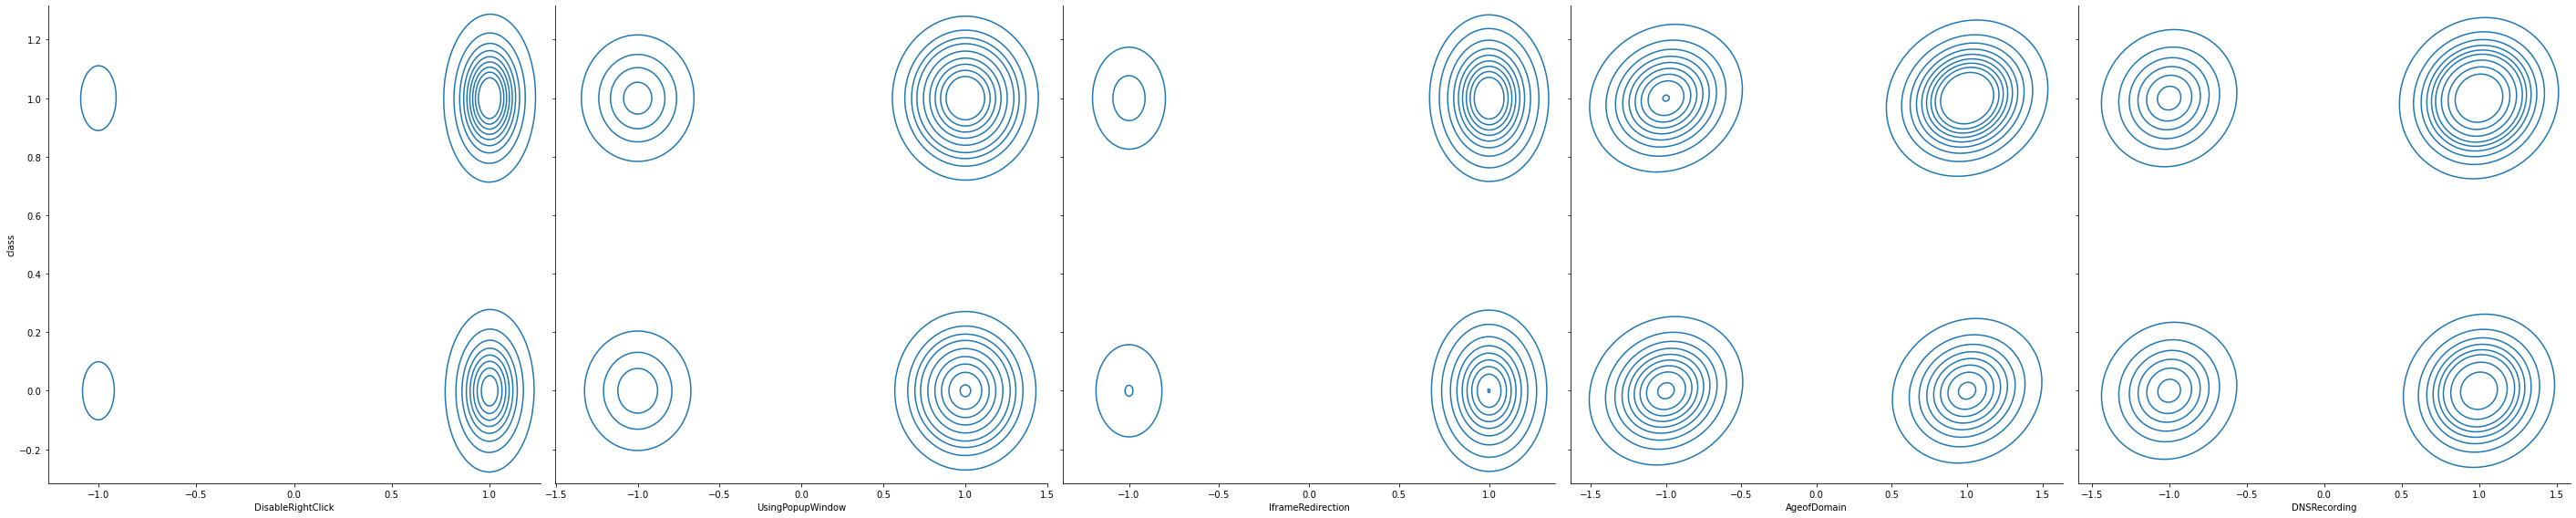

In [15]:
sns.pairplot(data, x_vars=data.columns[21:26], y_vars=['class'], height=8, aspect=1, kind='kde')

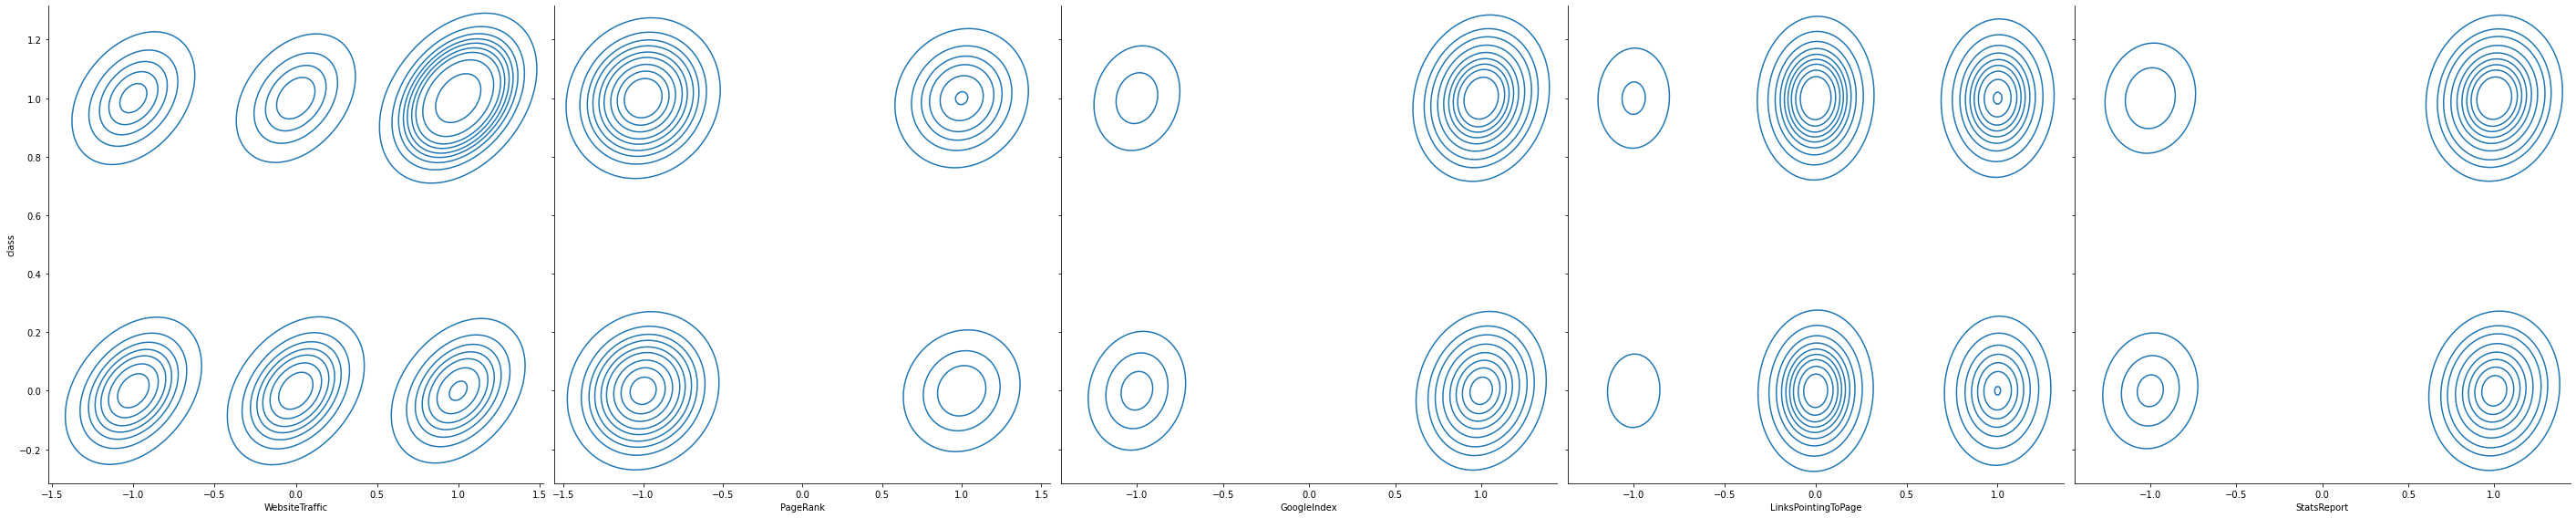

In [16]:
sns.pairplot(data, x_vars=data.columns[26:31], y_vars=['class'], height=8, aspect=1, kind='kde')

## Heatmap representation of the dataset

<AxesSubplot:>

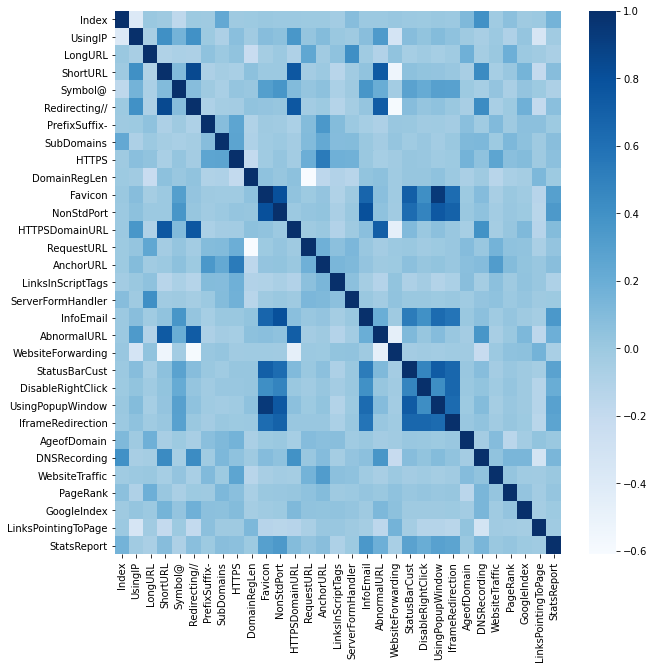

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.loc[:, data.columns != 'class'].corr(),cmap='Blues', ax=ax)

## Heatmaps to represent the confusion matrices of the 4 models' predictions

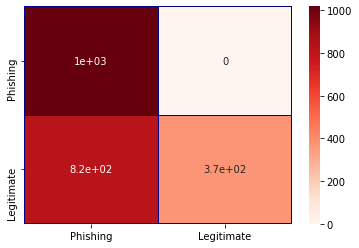

In [18]:
cm1 = confusion_matrix(y_test,nbc.predict(X_test))
ax = plt.axes()
sns.heatmap(cm1,cmap='Reds',annot=True,xticklabels=['Phishing', 'Legitimate'],yticklabels=['Phishing', 'Legitimate'],linecolor="Darkblue",linewidths=0.1,ax=ax)

plt.show()

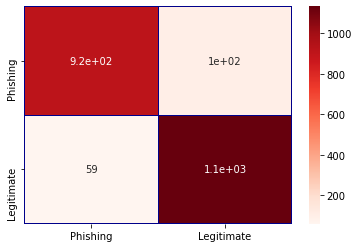

In [19]:
cm1 = confusion_matrix(y_test,logreg.predict(X_test))
ax = plt.axes()
sns.heatmap(cm1,cmap='Reds',annot=True,xticklabels=['Phishing', 'Legitimate'],yticklabels=['Phishing', 'Legitimate'],linecolor="Darkblue",linewidths=0.1,ax=ax)

plt.show()

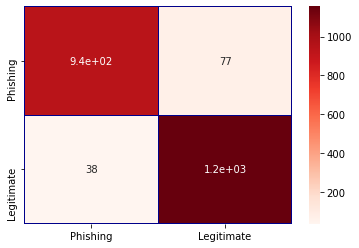

In [20]:
cm1 = confusion_matrix(y_test,mysvm.predict(X_test))
ax = plt.axes()
sns.heatmap(cm1,cmap='Reds',annot=True,xticklabels=['Phishing', 'Legitimate'],yticklabels=['Phishing', 'Legitimate'],linecolor="Darkblue",linewidths=0.1,ax=ax)

plt.show()

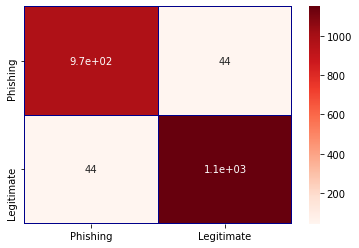

In [21]:
cm1 = confusion_matrix(y_test,mlc.predict(X_test))
ax = plt.axes()
sns.heatmap(cm1,cmap='Reds',annot=True,xticklabels=['Phishing', 'Legitimate'],yticklabels=['Phishing', 'Legitimate'],linecolor="Darkblue",linewidths=0.1,ax=ax)

plt.show()

# Explainable AI

In [22]:
numSamples = 500

In [23]:
explainer = shap.KernelExplainer(nbc.predict_proba, X_train[:numSamples], feature_names=data.columns[1:-1])
shap_values = explainer.shap_values(X_test[:numSamples])

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

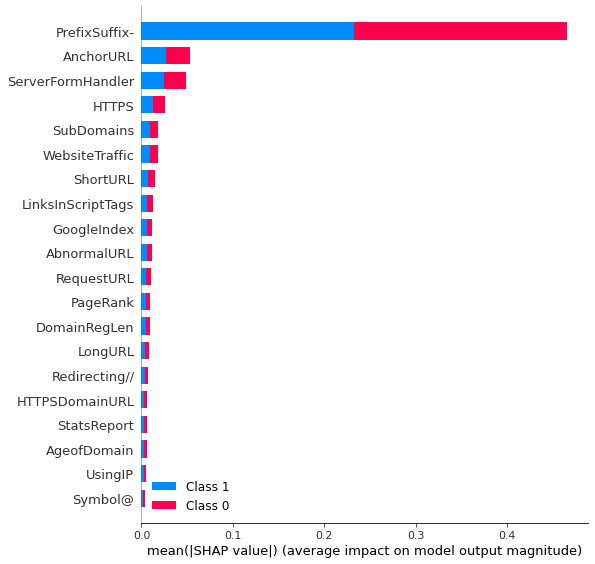

In [24]:
shap.summary_plot(shap_values,X_test[:numSamples],feature_names=data.columns[1:-1])

In [25]:
shap.initjs()
for i in range(1, 2):
    display(shap.force_plot(explainer.expected_value[i], shap_values[i], X_test,feature_names=data.columns[1:-1]))

In [26]:
explainer = shap.KernelExplainer(logreg.predict_proba, X_train[:numSamples], feature_names=data.columns[1:-1])
shap_values = explainer.shap_values(X_test[:numSamples])

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

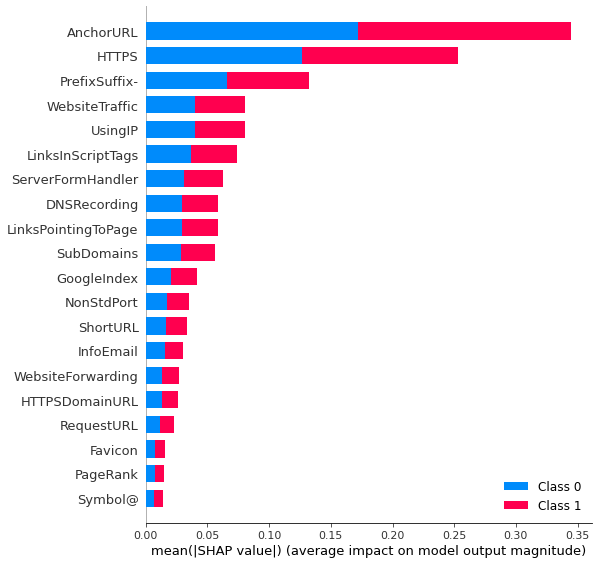

In [27]:
shap.summary_plot(shap_values,X_test[:numSamples],feature_names=data.columns[1:-1])

In [28]:
shap.initjs()
for i in range(1, 2):
    display(shap.force_plot(explainer.expected_value[i], shap_values[i], X_test,feature_names=data.columns[1:-1]))

In [29]:
numnSamples = 10

In [30]:
explainer = shap.KernelExplainer(mysvm.predict, X_train[:numnSamples], feature_names=data.columns[1:-1])
shap_values = explainer.shap_values(X_test[:numnSamples])

  0%|          | 0/10 [00:00<?, ?it/s]

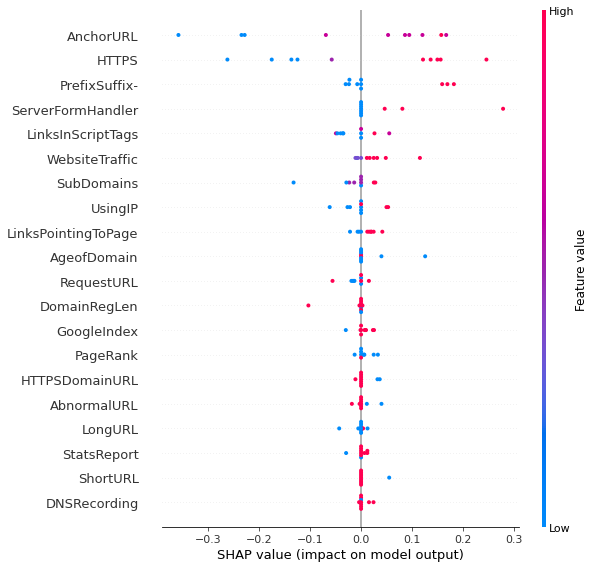

In [32]:
shap.summary_plot(shap_values,X_test[:numnSamples],feature_names=data.columns[1:-1])

In [34]:
explainer4 = shap.KernelExplainer(mlc.predict_proba, X_train[:numSamples], feature_names=data.columns[1:-1])
shap_values4 = explainer4.shap_values(X_test[:numSamples])

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

In [35]:
shap.initjs()
for i in range(1, 2):
    display(shap.force_plot(explainer4.expected_value[i], shap_values4[i], X_test,feature_names=data.columns[1:-1]))

In [37]:
print('Fin')

Fin
